In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

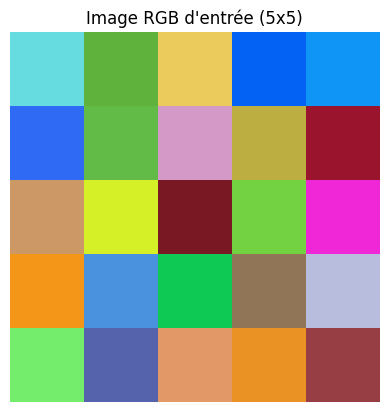

In [ ]:
# Génération d'une image RGB aléatoire de taille 5x5
np.random.seed(42)
input_image = np.random.randint(0, 256, size=(5, 5, 3), dtype=np.uint8)

# Reshape pour le CNN : (batch_size, height, width, channels)
input_tensor = input_image.reshape((1, 5, 5, 3))

# Affichage de l'image RGB originale
plt.imshow(input_image)
plt.title("Image RGB d'entrée (5x5)")
plt.axis('off')
plt.show()


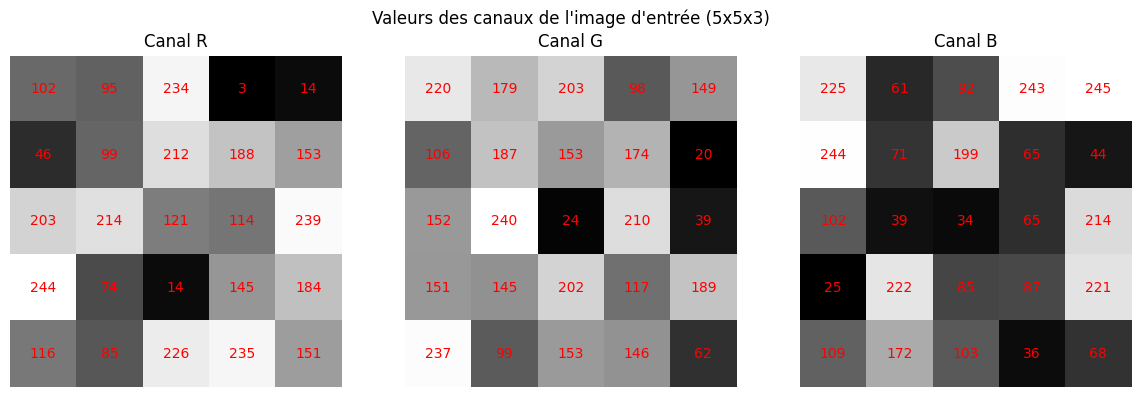

In [ ]:
# Afficher chaque canal de l'image (R, G, B) avec les valeurs numériques
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

channel_names = ['R', 'G', 'B']
for i in range(3):
    channel = input_image[:, :, i]
    axs[i].imshow(channel, cmap='gray')
    axs[i].set_title(f"Canal {channel_names[i]}")
    axs[i].axis('off')
    # Afficher les valeurs dans chaque pixel
    for (y, x), val in np.ndenumerate(channel):
        axs[i].text(x, y, str(val), ha='center', va='center', color='red', fontsize=10)

plt.suptitle("Valeurs des canaux de l'image d'entrée (5x5x3)")
plt.tight_layout()
plt.show()


In [ ]:
# Crée un modèle avec une seule couche Conv2D avec 2 filtres 3x3
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=2,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='valid',
        use_bias=True,
        activation=None,
        input_shape=(5, 5, 3)
    )
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 2)        │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

🔍 Shape des filtres : (3, 3, 3, 2) (3x3, 3 canaux, 2 filtres)


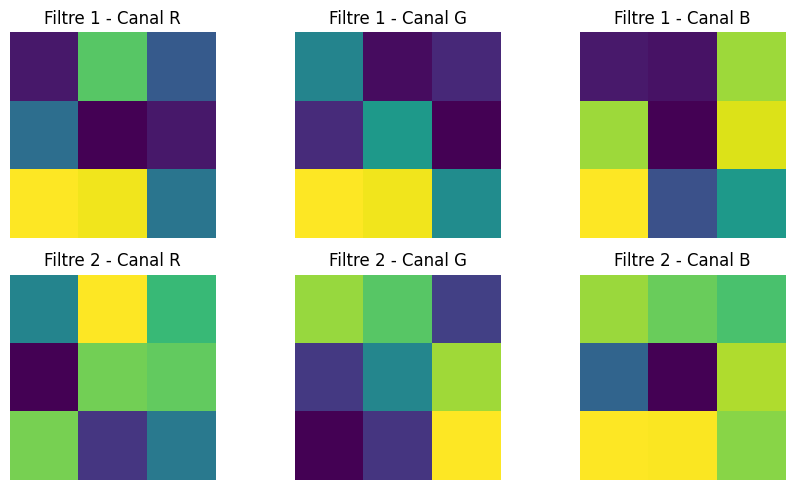

In [ ]:
# Récupérer les poids (filtres) de la couche
filters = model.layers[0].get_weights()[0]  # shape: (3, 3, 3, 2) -> (H, W, in_channels, out_channels)

print(f"🔍 Shape des filtres : {filters.shape} (3x3, 3 canaux, 2 filtres)")

# Affichage des filtres
fig, axs = plt.subplots(2, 3, figsize=(9, 5))

for i in range(2):  # pour chaque filtre
    for c in range(3):  # pour chaque canal RGB
        ax = axs[i, c]
        ax.imshow(filters[:, :, c, i], cmap='viridis')
        ax.set_title(f"Filtre {i+1} - Canal {['R','G','B'][c]}")
        ax.axis('off')

plt.tight_layout()
plt.show()


/tmp/ipython-input-3004494297.py:16: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


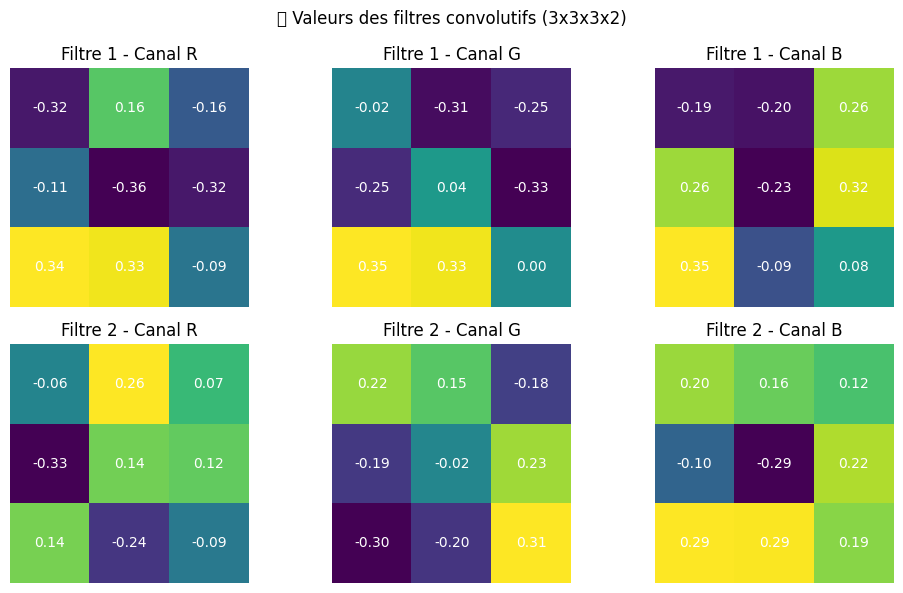

In [ ]:
# Afficher les valeurs numériques des filtres (3x3, 3 canaux, 2 filtres)
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

for i in range(2):  # filtres
    for c in range(3):  # canaux R, G, B
        weights = filters[:, :, c, i]
        ax = axs[i, c]
        ax.imshow(weights, cmap='viridis')
        ax.set_title(f"Filtre {i+1} - Canal {channel_names[c]}")
        ax.axis('off')
        # Afficher les valeurs
        for (y, x), val in np.ndenumerate(weights):
            ax.text(x, y, f"{val:.2f}", ha='center', va='center', color='white', fontsize=10)

plt.suptitle("🧪 Valeurs des filtres convolutifs (3x3x3x2)")
plt.tight_layout()
plt.show()


In [ ]:
# Appliquer la convolution à l'image d'entrée
output = model.predict(input_tensor)

# Shape de la sortie : (1, 3, 3, 2)
output_images = output[0]  # remove batch dim
print(f"Shape de la sortie : {output_images.shape}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Shape de la sortie : (3, 3, 2)


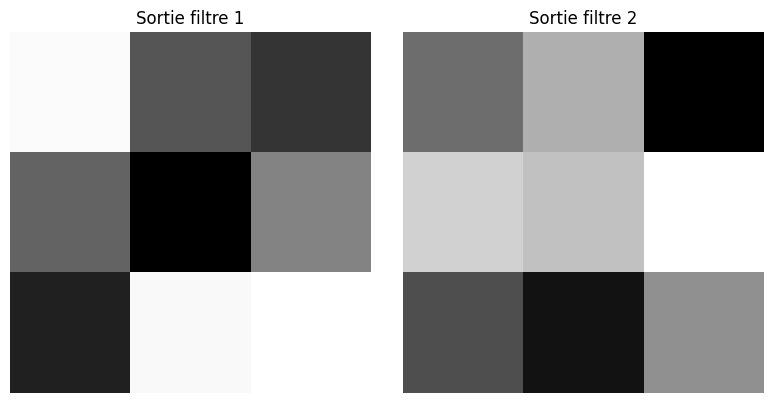

In [ ]:
# Fonction pour normaliser pour affichage
def normalize_image(img):
    img_min = np.min(img)
    img_max = np.max(img)
    if img_max - img_min == 0:
        return np.zeros_like(img)
    return (img - img_min) / (img_max - img_min)

# Affichage des images de sortie
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for i in range(2):
    axs[i].imshow(normalize_image(output_images[:, :, i]), cmap='gray')
    axs[i].set_title(f"Sortie filtre {i+1}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Affichage numérique des matrices de sortie
for i in range(2):
    print(f"📊 Matrice de sortie filtre {i+1} :")
    print(np.round(output_images[:, :, i], 2))
    print()


📊 Matrice de sortie filtre 1 :
[[  34.45  -90.44 -114.92]
 [ -79.58 -154.69  -54.96]
 [-129.13   33.14   38.16]]

📊 Matrice de sortie filtre 2 :
[[103.71 150.64  24.42]
 [175.28 163.94 209.  ]
 [ 81.    37.7  128.83]]



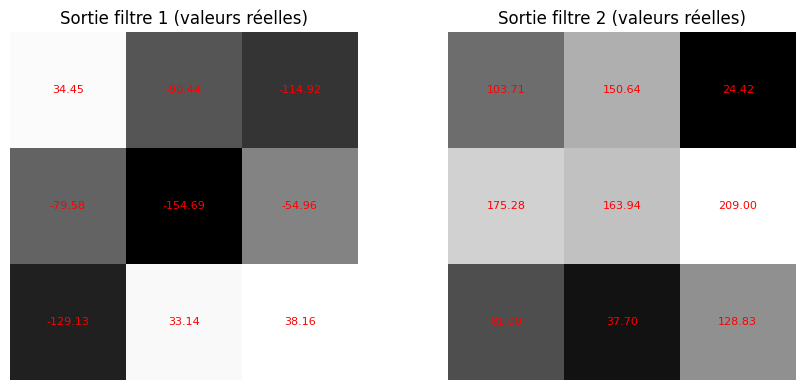

In [ ]:
# Fonction pour afficher l'image avec les valeurs réelles des pixels
def show_image_with_real_values(ax, image, title):
    ax.imshow(image, cmap='gray', vmin=np.min(image), vmax=np.max(image))
    ax.set_title(title)
    ax.axis('off')

    # Afficher les valeurs réelles dans chaque pixel (sans normalisation)
    for (i, j), val in np.ndenumerate(image):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)

# Création des sous-graphes pour afficher les résultats
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Visualisation des sorties des filtres avec les valeurs réelles dans les pixels
for i in range(2):
    show_image_with_real_values(axs[i], output_images[:, :, i], f"Sortie filtre {i+1} (valeurs réelles)")

plt.tight_layout()
plt.show()


In [ ]:
# Créer un autre modèle avec Conv2D et MaxPooling2D
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=2,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='valid',
        use_bias=False,
        activation=None,
        input_shape=(5, 5, 3)
    ),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')  # Appliquer MaxPooling
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 2)        │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Appliquer le modèle sur l'image d'entrée
output_max_pooling = model_1.predict(input_tensor)

# Sortie après MaxPooling : shape (1, 2, 2, 2) -> 2x2 pour chaque filtre
output_pooling_images_max_pooling = output_max_pooling[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


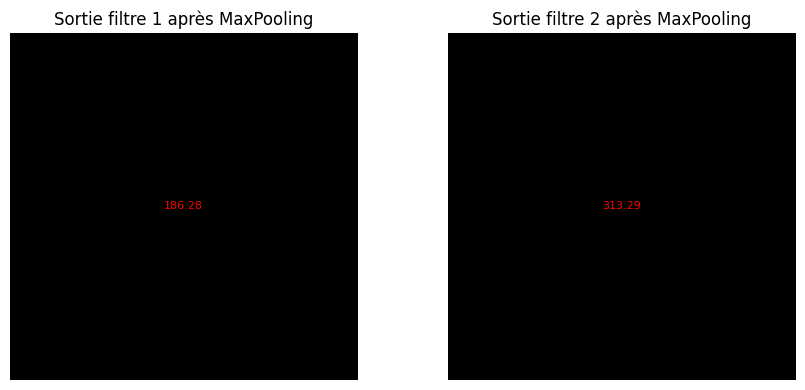

In [ ]:
# Afficher les résultats avec les valeurs réelles
def show_image_with_real_values(ax, image, title):
    ax.imshow(image, cmap='gray', vmin=np.min(image), vmax=np.max(image))
    ax.set_title(title)
    ax.axis('off')

    # Afficher les valeurs réelles dans chaque pixel (sans normalisation)
    for (i, j), val in np.ndenumerate(image):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)

# Création des sous-graphes pour afficher les résultats
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Visualisation des sorties des filtres après MaxPooling avec les valeurs réelles
for i in range(2):
    show_image_with_real_values(axs[i], output_pooling_images_max_pooling[:, :, i], f"Sortie filtre {i+1} après MaxPooling")

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt

# Charger MNIST et Fashion MNIST
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

# Normalisation des données
X_train_mnist, X_test_mnist = X_train_mnist / 255.0, X_test_mnist / 255.0
X_train_fashion, X_test_fashion = X_train_fashion / 255.0, X_test_fashion / 255.0

# Reshaper les données pour qu'elles soient compatibles avec le CNN
X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1)
X_test_mnist = X_test_mnist.reshape(-1, 28, 28, 1)
X_train_fashion = X_train_fashion.reshape(-1, 28, 28, 1)
X_test_fashion = X_test_fashion.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Créer le modèle
model_mnist = create_cnn_model((28, 28, 1))

# Entraînement du modèle
history_mnist = model_mnist.fit(X_train_mnist, y_train_mnist, epochs=10, validation_data=(X_test_mnist, y_test_mnist))

# Évaluation du modèle
test_loss, test_acc = model_mnist.evaluate(X_test_mnist, y_test_mnist)
print(f'Précision sur MNIST : {test_acc * 100:.2f}%')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8980 - loss: 0.3223 - val_accuracy: 0.9801 - val_loss: 0.0581
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0477 - val_accuracy: 0.9912 - val_loss: 0.0309
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9906 - loss: 0.0290 - val_accuracy: 0.9876 - val_loss: 0.0379
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9910 - loss: 0.0249 - val_accuracy: 0.9877 - val_loss: 0.0402
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9891 - val_loss: 0.0342
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9958 - loss: 0.0129 - val_accuracy: 0.9921 - val_loss: 0.0309
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9957 - loss: 0.0122 - val_accuracy: 0.9916 - val_loss: 0.0307
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9965 - loss: 0.0100 -

In [ ]:
# Créer le modèle
model_fashion = create_cnn_model((28, 28, 1))

# Entraînement du modèle
history_fashion = model_fashion.fit(X_train_fashion, y_train_fashion, epochs=10, validation_data=(X_test_fashion, y_test_fashion))

# Évaluation du modèle
test_loss_fashion, test_acc_fashion = model_fashion.evaluate(X_test_fashion, y_test_fashion)
print(f'Précision sur Fashion MNIST : {test_acc_fashion * 100:.2f}%')


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7401 - loss: 0.7118 - val_accuracy: 0.8651 - val_loss: 0.3709
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8803 - loss: 0.3352 - val_accuracy: 0.8897 - val_loss: 0.3091
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8991 - loss: 0.2799 - val_accuracy: 0.8998 - val_loss: 0.2806
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9089 - loss: 0.2487 - val_accuracy: 0.9004 - val_loss: 0.2790
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9154 - loss: 0.2251 - val_accuracy: 0.9038 - val_loss: 0.2667
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9254 - loss: 0.2048 - val_accuracy: 0.8992 - val_loss: 0.2780
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9318 - loss: 0.1829 - val_accuracy: 0.9037 - val_loss: 0.2742
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9396 - loss: 0.1634 -

In [ ]:
# Visualisation des courbes de Loss et Accuracy pour l'entraînement et la validation
def plot_training_history(history, dataset_name):
    plt.figure(figsize=(12, 6))

    # Courbe de Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss - Train')
    plt.plot(history.history['val_loss'], label='Loss - Validation')
    plt.title(f'Courbe de Loss - {dataset_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Courbe d'Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy - Train')
    plt.plot(history.history['val_accuracy'], label='Accuracy - Validation')
    plt.title(f'Courbe d\'Accuracy - {dataset_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


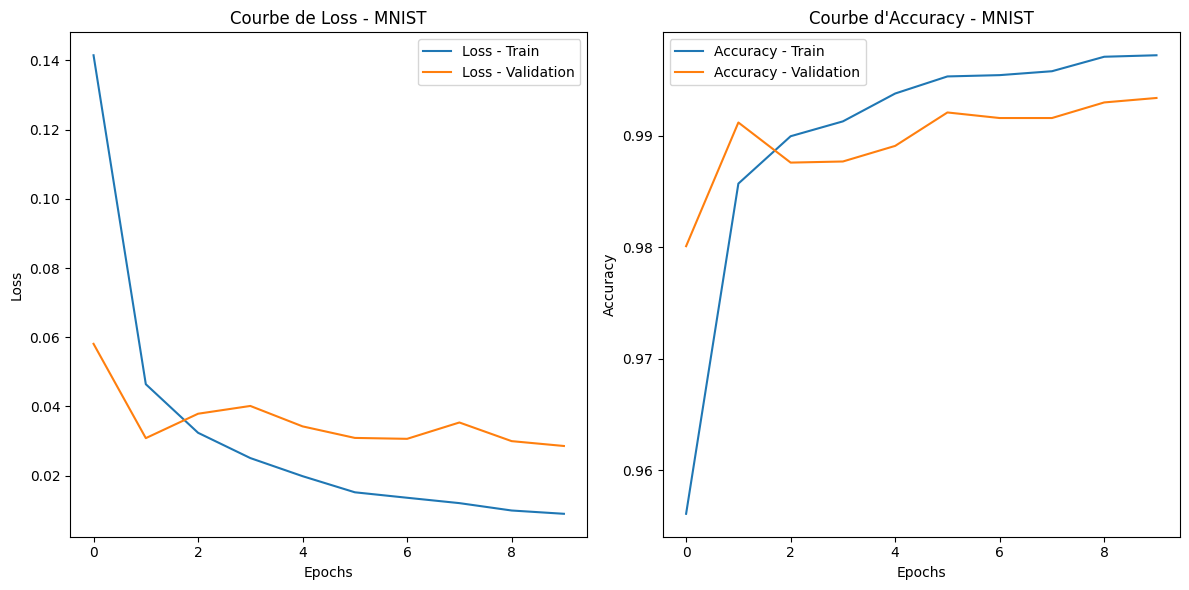

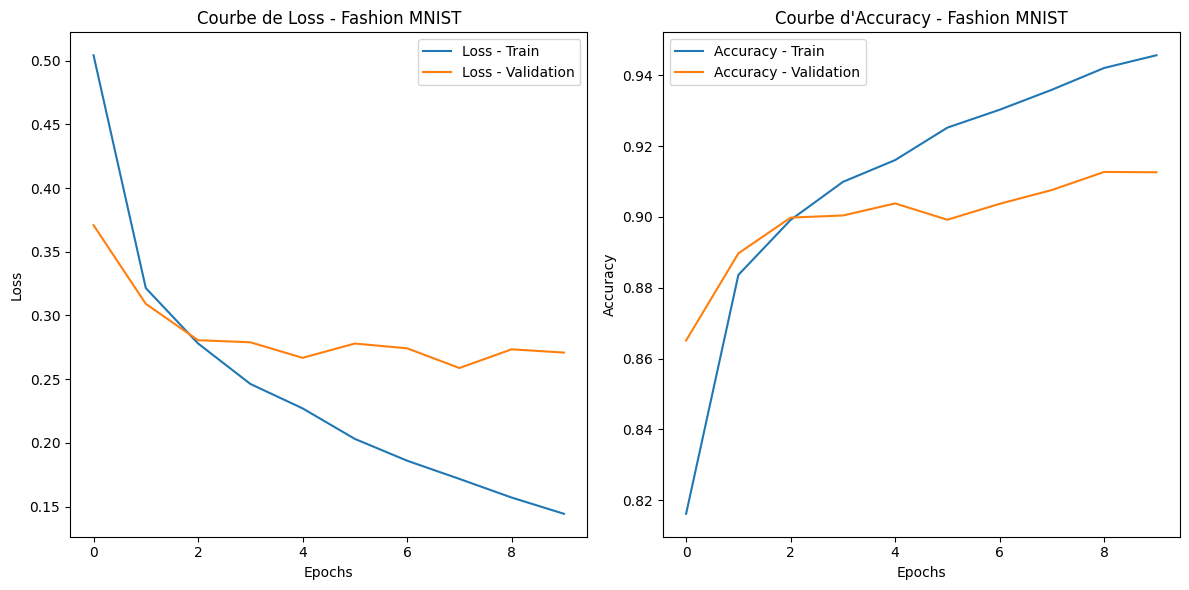

In [ ]:
# Visualisation pour MNIST
plot_training_history(history_mnist, "MNIST")

# Visualisation pour Fashion MNIST
plot_training_history(history_fashion, "Fashion MNIST")


In [ ]:
def create_deep_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout pour éviter le sur-apprentissage
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
# Créer le modèle amélioré
model_mnist_deep = create_deep_cnn_model((28, 28, 1))

# Entraînement du modèle amélioré
history_mnist_deep = model_mnist_deep.fit(X_train_mnist, y_train_mnist, epochs=15, validation_data=(X_test_mnist, y_test_mnist))

# Évaluation du modèle
test_loss_deep, test_acc_deep = model_mnist_deep.evaluate(X_test_mnist, y_test_mnist)
print(f'Précision sur MNIST avec modèle profond : {test_acc_deep * 100:.2f}%')


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8290 - loss: 0.5309 - val_accuracy: 0.9766 - val_loss: 0.0741
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9734 - loss: 0.0916 - val_accuracy: 0.9848 - val_loss: 0.0513
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9803 - loss: 0.0693 - val_accuracy: 0.9848 - val_loss: 0.0547
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9854 - loss: 0.0505 - val_accuracy: 0.9854 - val_loss: 0.0497
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9888 - loss: 0.0384 - val_accuracy: 0.9834 - val_loss: 0.0584
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.9878 - val_loss: 0.0465
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9917 - loss: 0.0283 - val_accuracy: 0.9862 - val_loss: 0.0497
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9923 - loss: 0.0250 -

In [ ]:
# Créer le modèle amélioré
model_fashion_deep = create_deep_cnn_model((28, 28, 1))

# Entraînement du modèle amélioré
history_fashion_deep = model_fashion_deep.fit(X_train_fashion, y_train_fashion, epochs=15, validation_data=(X_test_fashion, y_test_fashion))

# Évaluation du modèle
test_loss_fashion_deep, test_acc_fashion_deep = model_fashion_deep.evaluate(X_test_fashion, y_test_fashion)
print(f'Précision sur Fashion MNIST avec modèle profond : {test_acc_fashion_deep * 100:.2f}%')


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6693 - loss: 0.8959 - val_accuracy: 0.8357 - val_loss: 0.4451
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8407 - loss: 0.4419 - val_accuracy: 0.8549 - val_loss: 0.3955
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8656 - loss: 0.3712 - val_accuracy: 0.8712 - val_loss: 0.3472
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8815 - loss: 0.3274 - val_accuracy: 0.8823 - val_loss: 0.3239
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8888 - loss: 0.2992 - val_accuracy: 0.8811 - val_loss: 0.3266
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8999 - loss: 0.2741 - val_accuracy: 0.8918 - val_loss: 0.2952
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9057 - loss: 0.2550 - val_accuracy: 0.8884 - val_loss: 0.3085
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9142 - loss: 0.2364 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Activations de la couche conv2d : (1, 26, 26, 32)


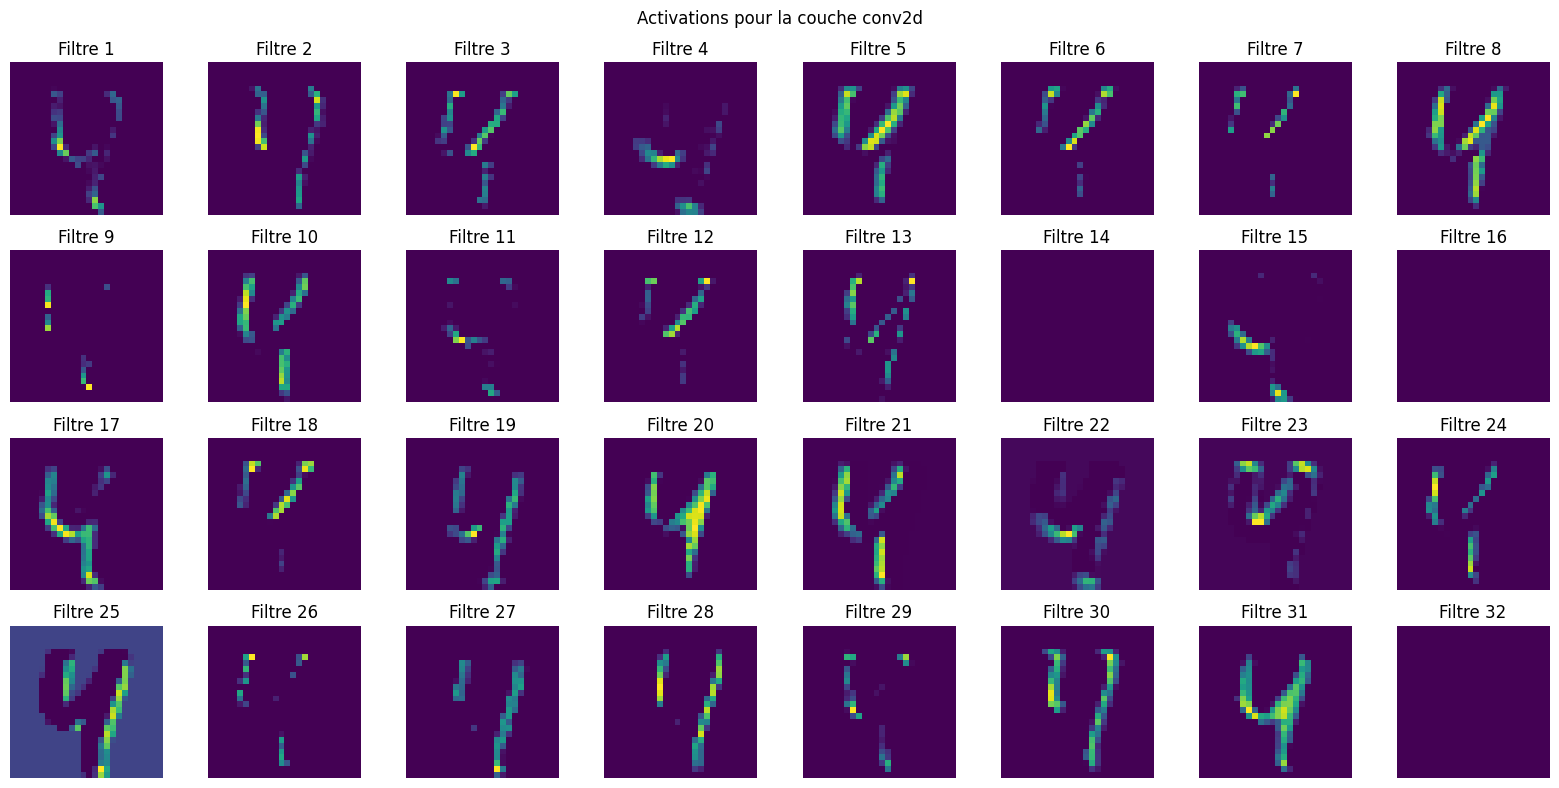

Activations de la couche conv2d_1 : (1, 11, 11, 64)


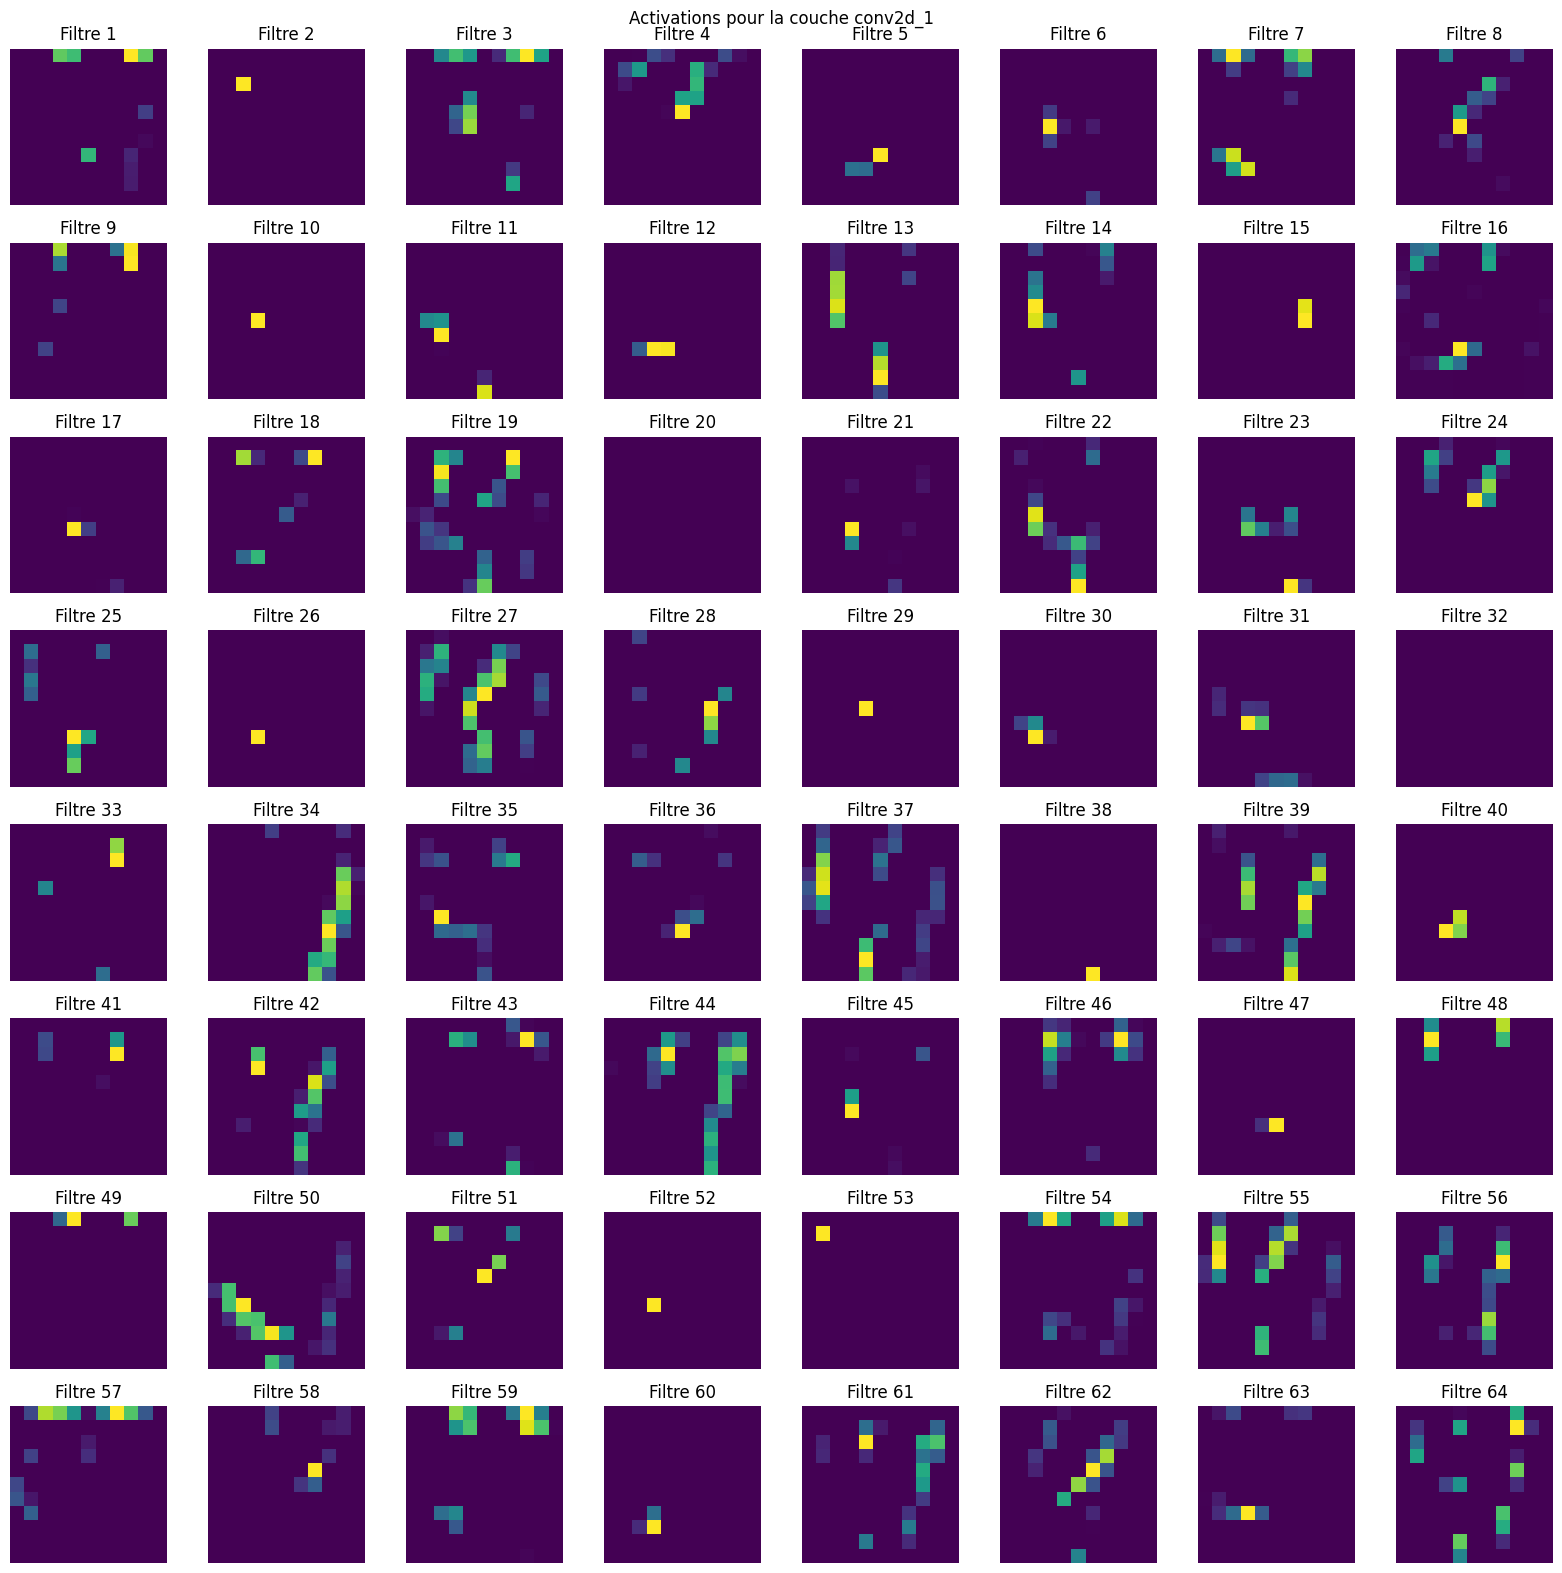

Activations de la couche conv2d_2 : (1, 3, 3, 64)


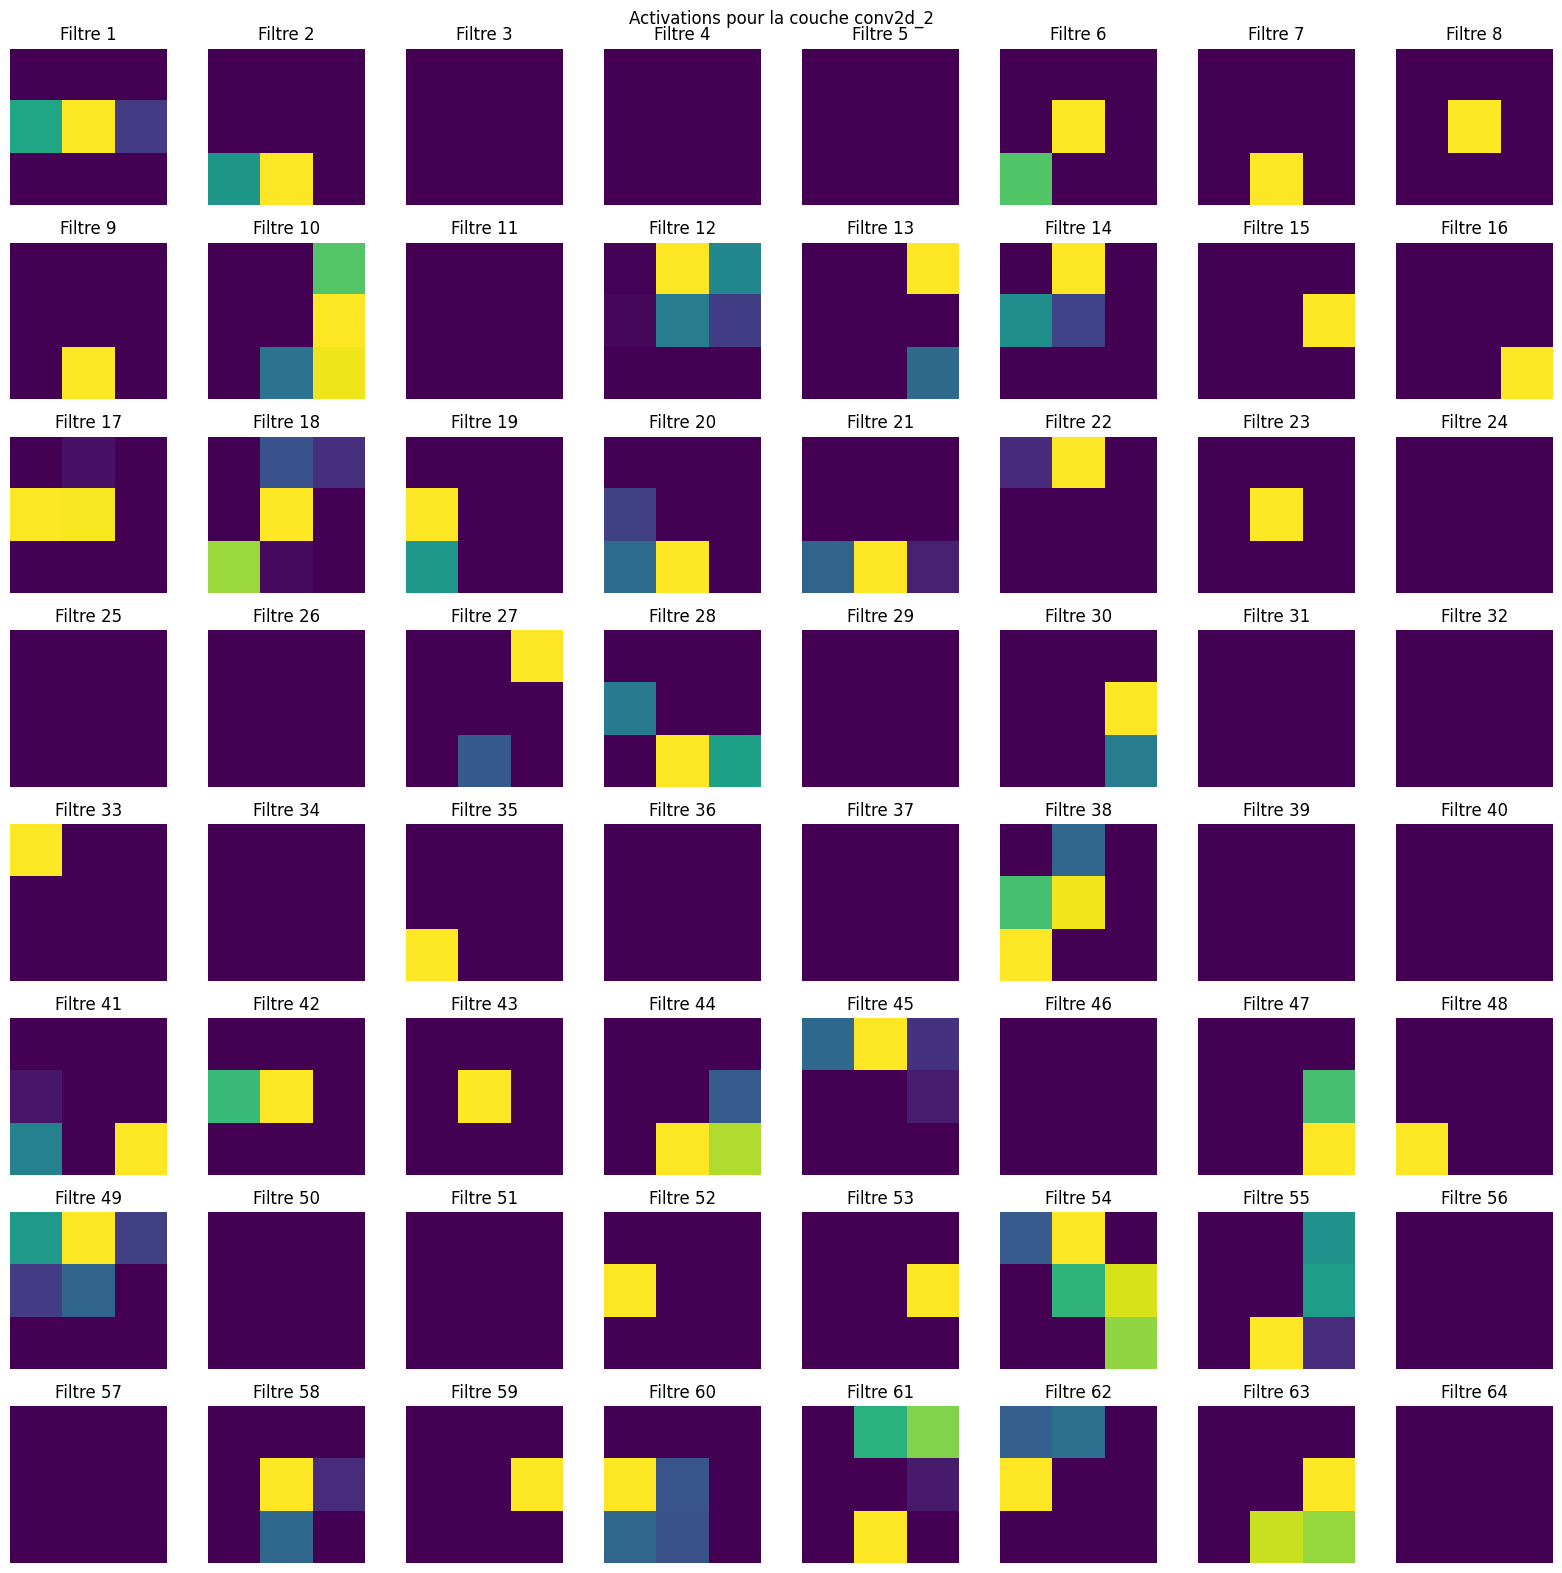

In [ ]:
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # Import tensorflow

# Fonction pour afficher les activations des couches d'un modèle
def plot_activations(model, image):
    # Ensure the image has the correct shape for prediction (batch_size, height, width, channels)
    input_image = image.reshape(1, 28, 28, 1)

    # Create a new Input layer with the same shape as the model's input
    input_tensor = tf.keras.Input(shape=(28, 28, 1))

    # Manually pass the input tensor through the layers of the trained model
    x = input_tensor
    layer_outputs = []
    layer_names = []

    for layer in model.layers:
        x = layer(x)
        if 'conv' in layer.name or 'maxpool' in layer.name:
            layer_outputs.append(x)
            layer_names.append(layer.name)

    # Create a model that returns the outputs of the selected layers
    activation_model = tf.keras.models.Model(inputs=input_tensor, outputs=layer_outputs)

    # Get the activations by predicting with the activation model
    activations = activation_model.predict(input_image)


    # Afficher les activations de chaque couche
    # If there is only one output layer, activations will not be a list, so handle that case
    if len(layer_names) == 1:
        activations = [activations]


    for layer_name, activation in zip(layer_names, activations):
        print(f"Activations de la couche {layer_name} : {activation.shape}")
        num_filters = activation.shape[-1]
        # Determine the number of columns for subplots, up to a maximum of 8 for better visualization
        cols = min(num_filters, 8)
        rows = (num_filters + cols - 1) // cols

        fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
        # Flatten axes array for easy iteration
        axes = axes.flatten()

        for i in range(num_filters):
            # Display the activation for the first image in the batch
            axes[i].imshow(activation[0, :, :, i], cmap='viridis')
            axes[i].set_title(f'Filtre {i+1}')
            axes[i].axis('off')

        # Hide any unused subplots
        for j in range(num_filters, len(axes)):
            axes[j].axis('off')

        plt.suptitle(f'Activations pour la couche {layer_name}')
        plt.tight_layout()
        plt.show()


# Sélectionner une image de test au hasard
random_index = 42  # Choix arbitraire
image = X_test_mnist[random_index]

# Visualiser les activations pour cette image de test
plot_activations(model_mnist, image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
Activations de la couche conv2d_9 : (1, 26, 26, 32)


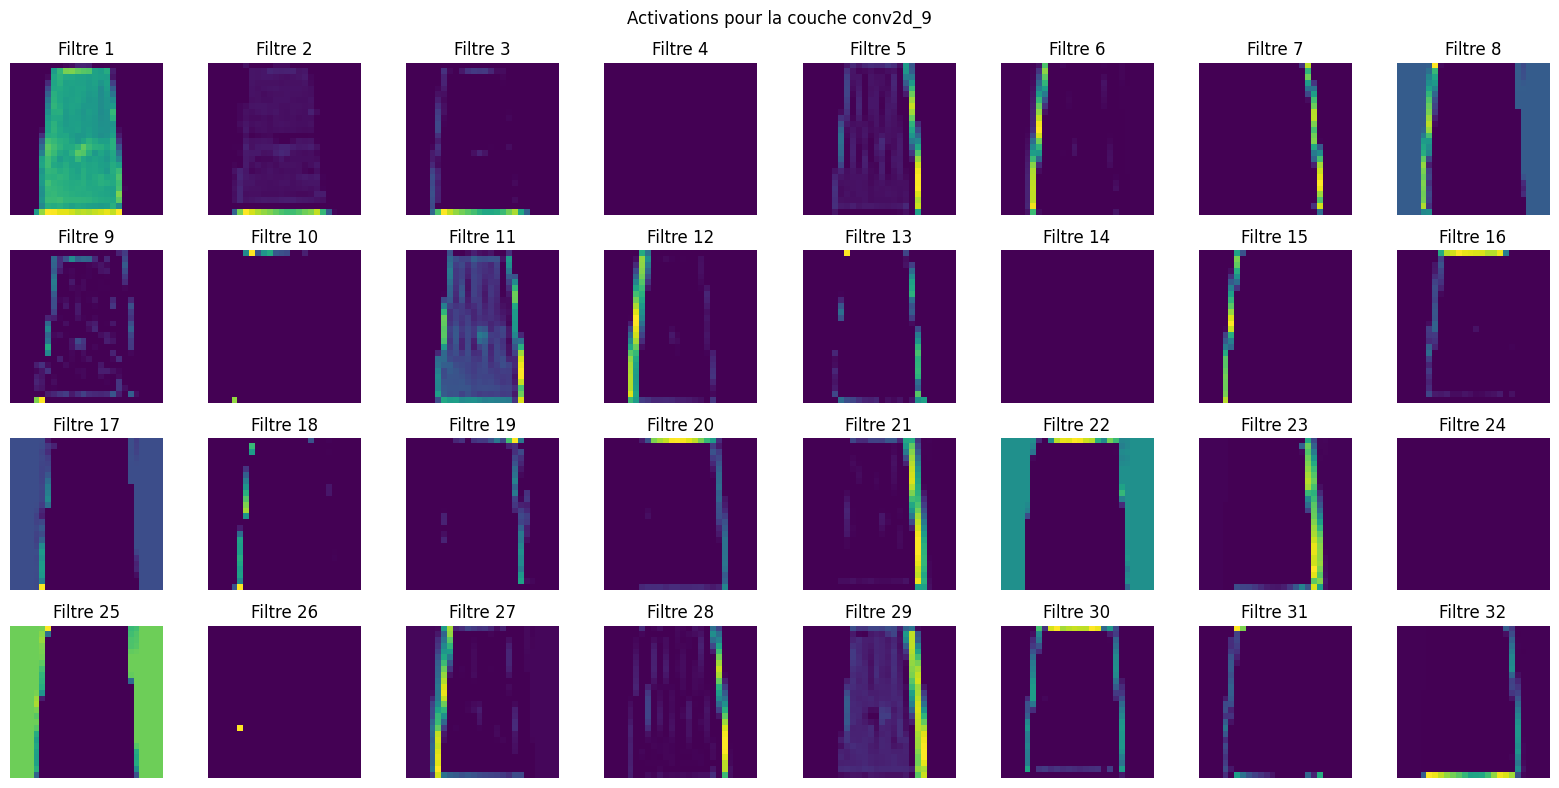

Activations de la couche conv2d_10 : (1, 11, 11, 64)


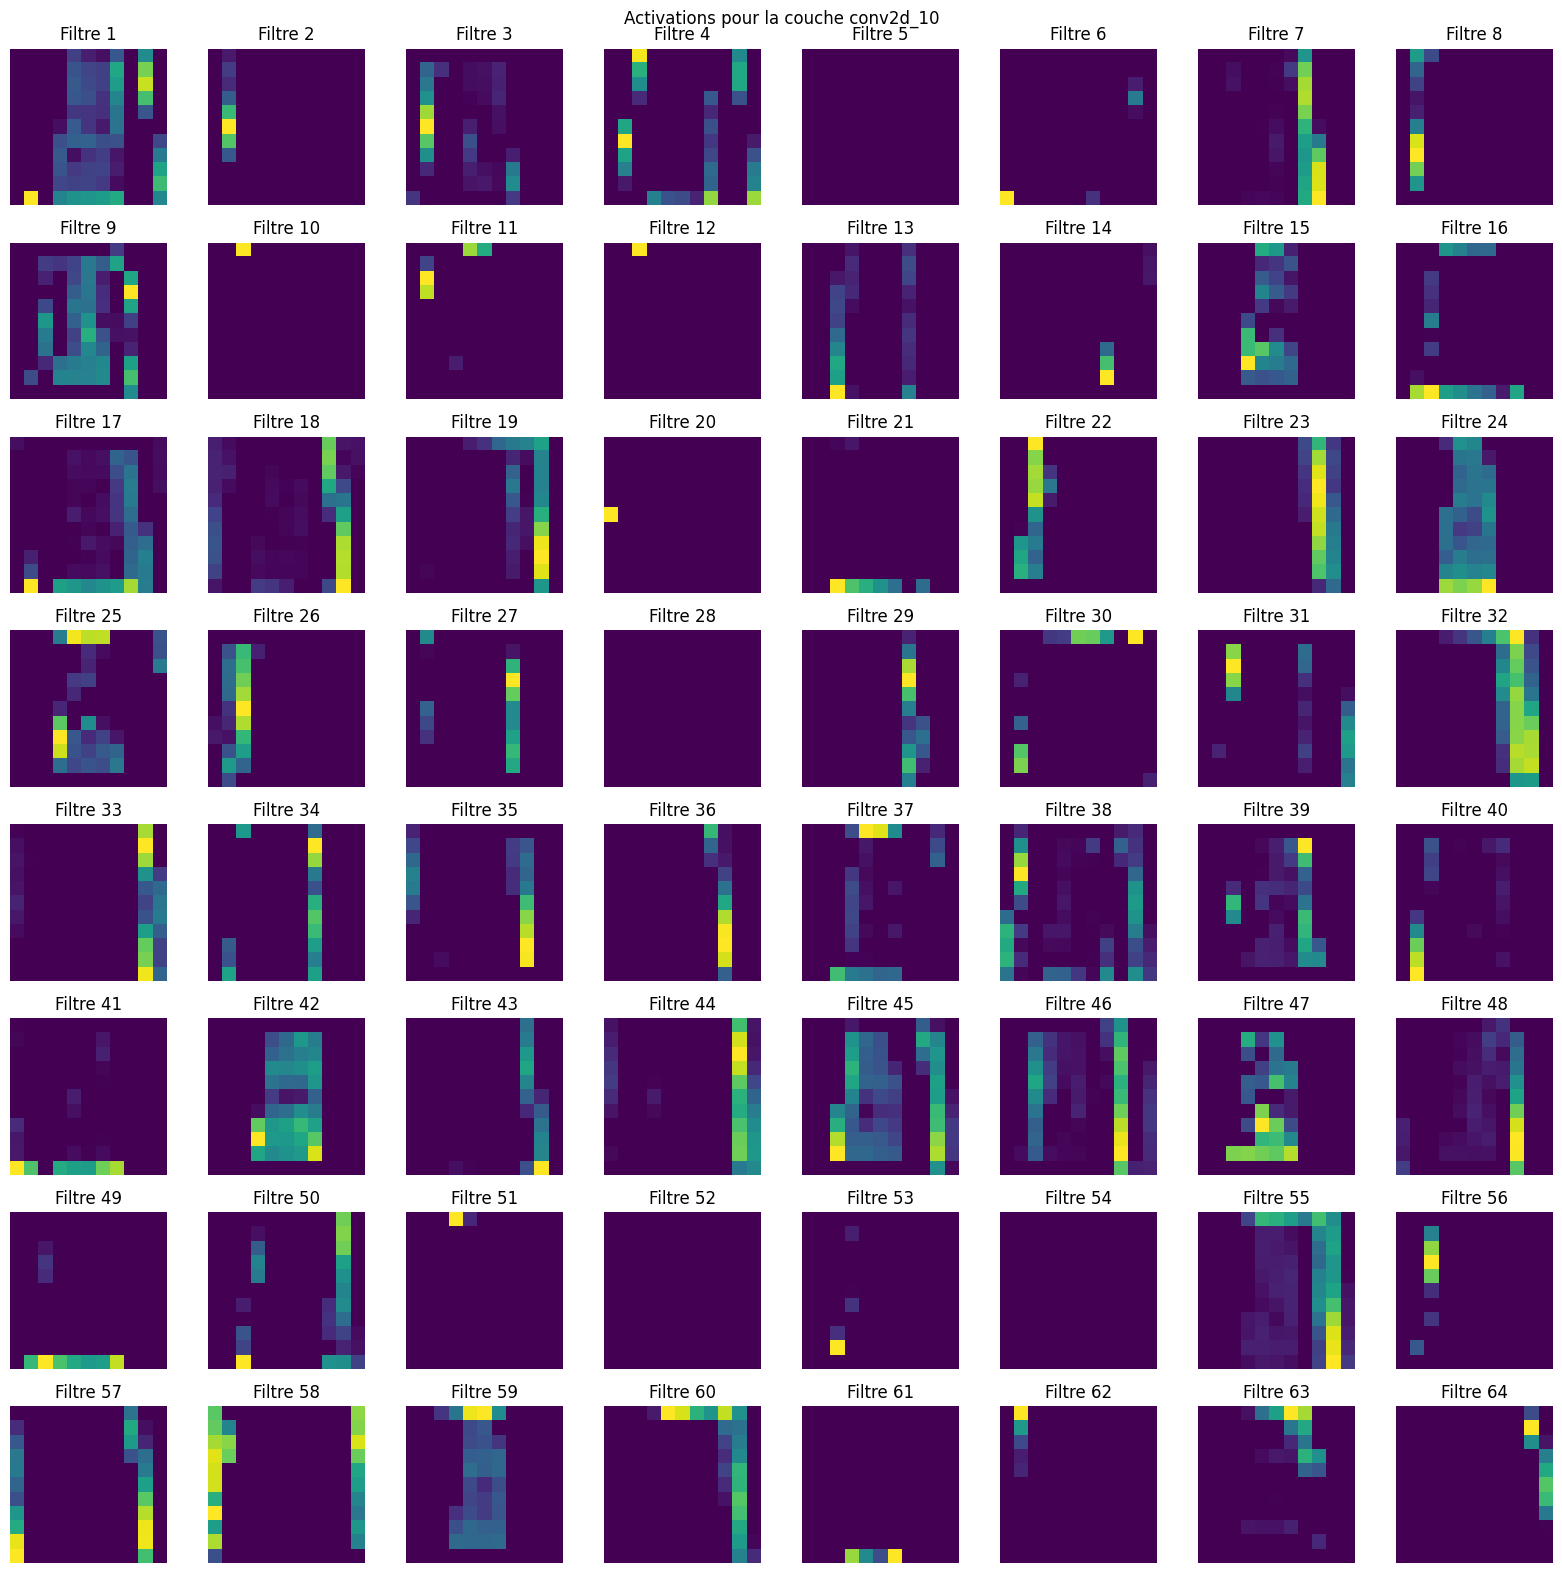

Activations de la couche conv2d_11 : (1, 3, 3, 128)


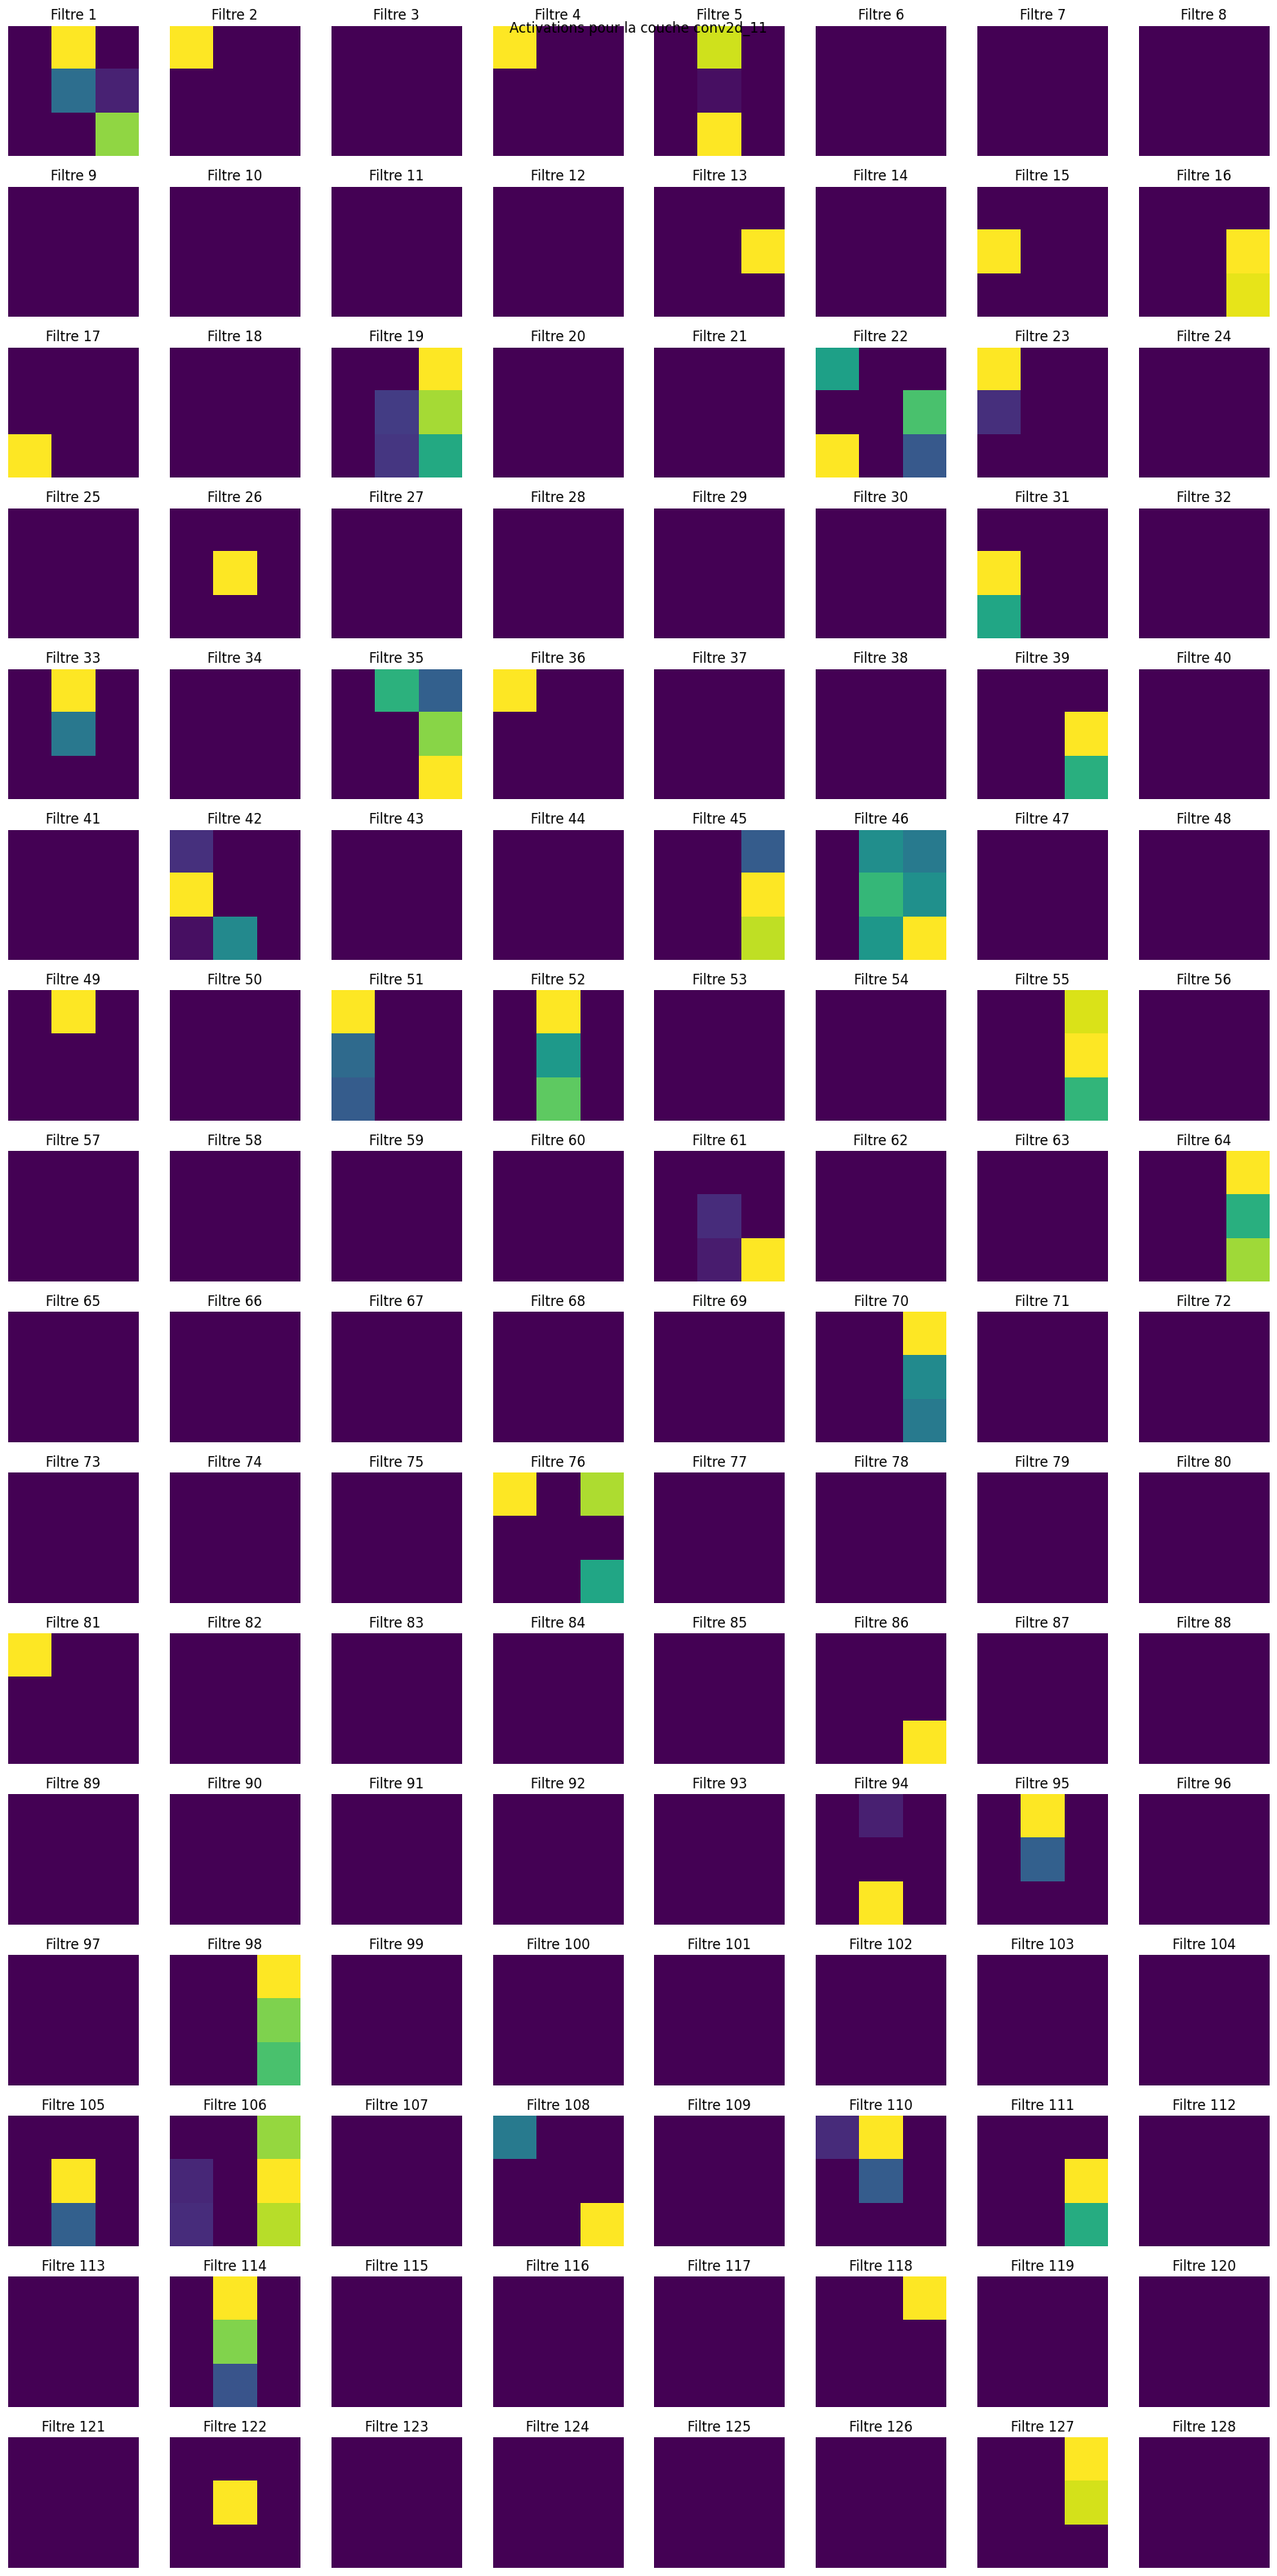

In [ ]:
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Fonction pour afficher les activations des couches d'un modèle
def plot_activations(model, image):
    # Ensure the image has the correct shape for prediction (batch_size, height, width, channels)
    input_image = image.reshape(1, 28, 28, 1)

    # Create a new Input layer with the same shape as the model's input
    input_tensor = tf.keras.Input(shape=(28, 28, 1))

    # Manually pass the input tensor through the layers of the trained model
    x = input_tensor
    layer_outputs = []
    layer_names = []

    for layer in model.layers:
        x = layer(x)
        if 'conv' in layer.name or 'maxpool' in layer.name:
            layer_outputs.append(x)
            layer_names.append(layer.name)

    # Create a model that returns the outputs of the selected layers
    activation_model = tf.keras.models.Model(inputs=input_tensor, outputs=layer_outputs)

    # Get the activations by predicting with the activation model
    activations = activation_model.predict(input_image)


    # Afficher les activations de chaque couche
    # If there is only one output layer, activations will not be a list, so handle that case
    if len(layer_names) == 1:
        activations = [activations]


    for layer_name, activation in zip(layer_names, activations):
        print(f"Activations de la couche {layer_name} : {activation.shape}")
        num_filters = activation.shape[-1]
        # Determine the number of columns for subplots, up to a maximum of 8 for better visualization
        cols = min(num_filters, 8)
        rows = (num_filters + cols - 1) // cols

        fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
        # Flatten axes array for easy iteration
        axes = axes.flatten()

        for i in range(num_filters):
            # Display the activation for the first image in the batch
            axes[i].imshow(activation[0, :, :, i], cmap='viridis')
            axes[i].set_title(f'Filtre {i+1}')
            axes[i].axis('off')

        # Hide any unused subplots
        for j in range(num_filters, len(axes)):
            axes[j].axis('off')

        plt.suptitle(f'Activations pour la couche {layer_name}')
        plt.tight_layout()
        plt.show()


# Sélectionner une image de test au hasard
random_index = 42  # Choix arbitraire
image = X_test_fashion[random_index]

# Visualiser les activations pour cette image de test
plot_activations(model_fashion_deep, image)

In [ ]:
def analyze_activations(activation, seuil=0.01):
    """
    Fonction qui analyse les activations des filtres et identifie les filtres inactifs
    """
    num_filters = activation.shape[-1]
    inactive_filters = []
    for i in range(num_filters):
        mean_activation = np.mean(activation[0, :, :, i])
        if mean_activation < seuil:  # Un seuil de 0.01 pour filtrer les filtres inactifs
            inactive_filters.append(i)
            print(f"Filtre {i} peut être considéré inactif (Moyenne des activations : {mean_activation:.3f})")
    return inactive_filters

# Appliquer l'analyse des activations sur la sortie du modèle
inactive_filters = analyze_activations(output)


In [ ]:
def prune_inactive_filters(model, inactive_filters):
    """
    Cette fonction met à zéro les filtres inactifs dans le modèle.
    """
    weights = model.layers[0].get_weights()  # Récupérer les poids de la couche Conv2D
    filters = weights[0]  # Les poids des filtres (shape: [kernel_height, kernel_width, num_channels, num_filters])

    for i in inactive_filters:
        print(f"Pruning du filtre {i}...")
        filters[:, :, :, i] = 0  # Mettre à zéro le filtre inactif

    model.layers[0].set_weights([filters, weights[1]])  # Mettre à jour les poids du modèle
    print("Pruning effectué avec succès.")

# Appliquer le pruning
prune_inactive_filters(model, inactive_filters)


In [ ]:
def reset_inactive_filters(model, inactive_filters):
    """
    Cette fonction réinitialise les filtres inactifs dans le modèle avec une nouvelle initialisation.
    """
    initializers = tf.keras.initializers.HeNormal()  # Initialisation He pour réinitialiser les poids des filtres

    weights = model.layers[0].get_weights()
    filters = weights[0]  # Les poids des filtres

    for i in inactive_filters:
        print(f"Réinitialisation du filtre {i}...")
        # Réinitialiser le filtre avec l'initialiseur
        filters[:, :, :, i] = initializers(shape=filters[:, :, :, i].shape)

    model.layers[0].set_weights([filters, weights[1]])  # Mettre à jour les poids du modèle
    print("Réinitialisation effectuée avec succès.")

# Réinitialiser les filtres inactifs
reset_inactive_filters(model, inactive_filters)


In [ ]:
def create_regularized_model(input_shape):
    """
    Crée un modèle avec régularisation L2 et Dropout pour améliorer l'apprentissage.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout pour éviter le sur-apprentissage
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Créer et entraîner un modèle avec régularisation
regularized_model = create_regularized_model((28, 28, 1))
history_regularized = regularized_model.fit(X_train_mnist, y_train_mnist, epochs=10, validation_data=(X_test_mnist, y_test_mnist))
